In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display
%matplotlib inline

## Open the data

In [2]:
df = pd.read_csv(
    "abalone.data",
    header=None,
    names=["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"])
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Map Sex Categories to Ordinal Number

In [3]:
# map sex to categorical
df["Sex"] = df["Sex"].map({"I": 0, "F": 1, "M": 2})

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Let's see the statistics of the original data

In [5]:
display("NaN values: %d" % df.isna().values.sum())
df.describe()

'NaN values: 0'

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.044530,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


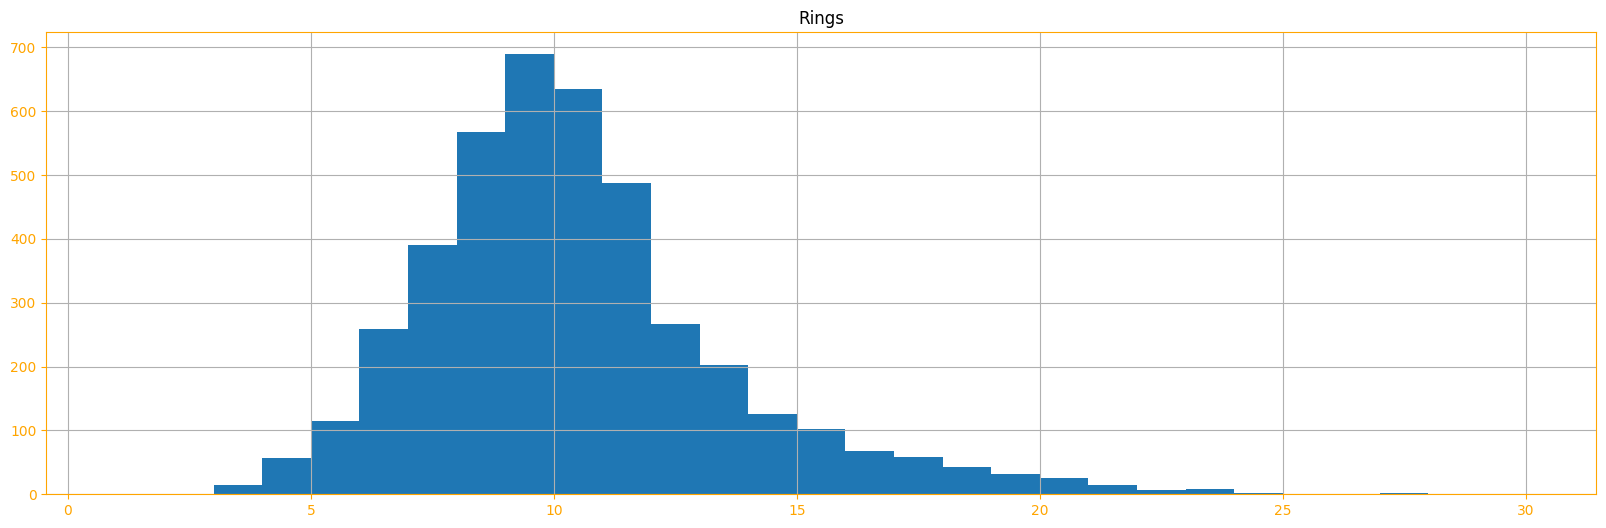

In [6]:
with plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'orange', 'ytick.color':'orange'}):
    df.hist(column="Rings", bins=np.arange(df["Rings"].min(), df["Rings"].max()+2), figsize=(20,6))

## Split the data to train:val:test = 0.7:0.1:0.2

In [7]:
train = df.sample(frac=0.8, random_state=200) #random state is a seed value
test = df.drop(train.index)
val = train.sample(frac=0.125, random_state=200) # 0.125*0.8 = 0.1
train = train.drop(val.index)
train.to_csv("abalone_train.csv", index=False)
val.to_csv("abalone_val.csv", index=False)
test.to_csv("abalone_test.csv", index=False)

## Let's see the statistics of the splits

In [8]:
df_train = pd.read_csv("abalone_train.csv")
df_val = pd.read_csv("abalone_val.csv")
df_test = pd.read_csv("abalone_test.csv")

In [9]:
display(df_train.describe())
display(df_val.describe())
display(df_test.describe())

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000
mean,1.055404,0.524142,0.407801,0.139360,0.831845,0.361164,0.181180,0.239137,9.938440
std,0.830282,0.120926,0.099573,0.039204,0.495935,0.225234,0.110342,0.140012,3.252354
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.345000,0.115000,0.436375,0.184000,0.092500,0.128000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799250,0.333000,0.170500,0.231500,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.165125,0.502250,0.254000,0.330000,11.000000
max,2.000000,0.800000,0.630000,0.515000,2.825500,1.488000,0.641500,1.005000,27.000000


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1.009569,0.524175,0.409533,0.141148,0.824165,0.355730,0.177482,0.239983,10.059809
std,0.822294,0.120446,0.101462,0.061765,0.487659,0.217200,0.108580,0.143101,3.353478
min,0.000000,0.170000,0.125000,0.040000,0.024000,0.009500,0.000500,0.005000,4.000000
25%,0.000000,0.450000,0.345000,0.115000,0.444000,0.183625,0.089000,0.135000,8.000000
50%,1.000000,0.550000,0.427500,0.140000,0.813750,0.352250,0.173250,0.235000,10.000000
75%,2.000000,0.613750,0.485000,0.165000,1.131875,0.493000,0.243875,0.325000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.779500,1.348500,0.760000,0.815000,23.000000


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,1.023952,0.523377,0.407335,0.139246,0.820168,0.354898,0.180099,0.237181,9.853892
std,0.822000,0.117092,0.097033,0.038267,0.472337,0.212760,0.107656,0.134453,3.056262
min,0.000000,0.140000,0.105000,0.000000,0.014500,0.005000,0.002500,0.005000,4.000000
25%,0.000000,0.455000,0.350000,0.115000,0.463000,0.191250,0.097500,0.135000,8.000000
50%,1.000000,0.540000,0.425000,0.145000,0.795500,0.337500,0.170000,0.235000,9.000000
75%,2.000000,0.610000,0.480000,0.165000,1.141000,0.504250,0.256000,0.319750,11.000000
max,2.000000,0.760000,0.605000,0.240000,2.381000,1.081500,0.522500,0.725000,29.000000


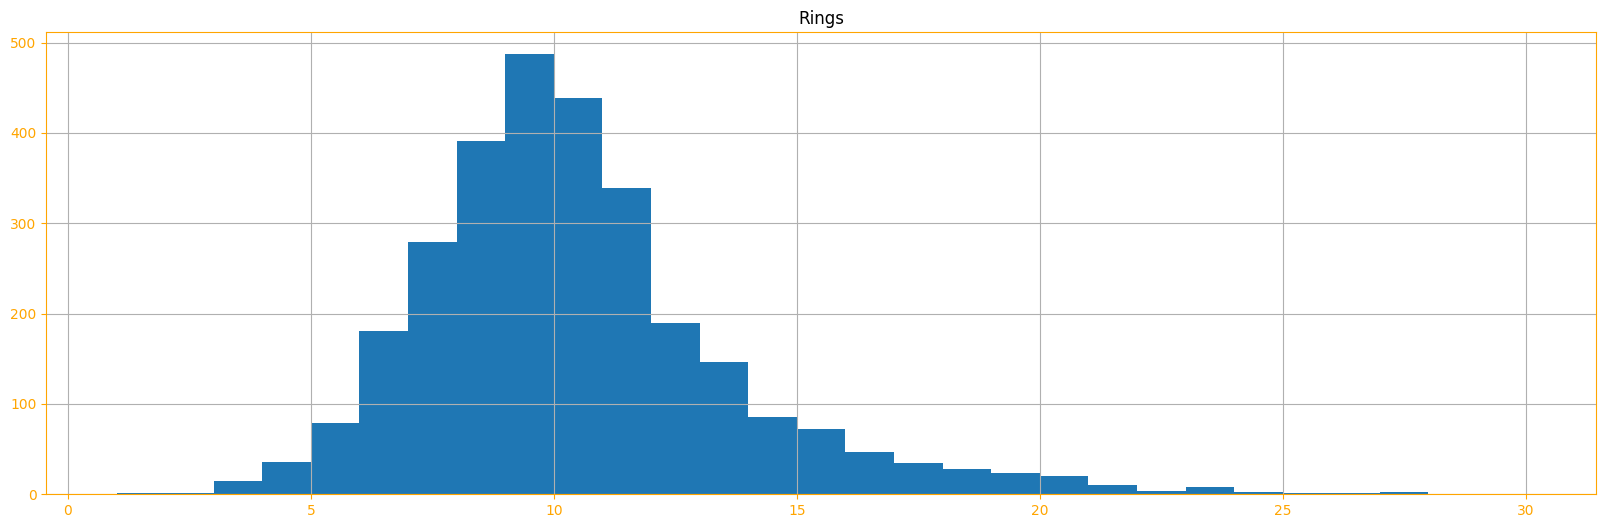

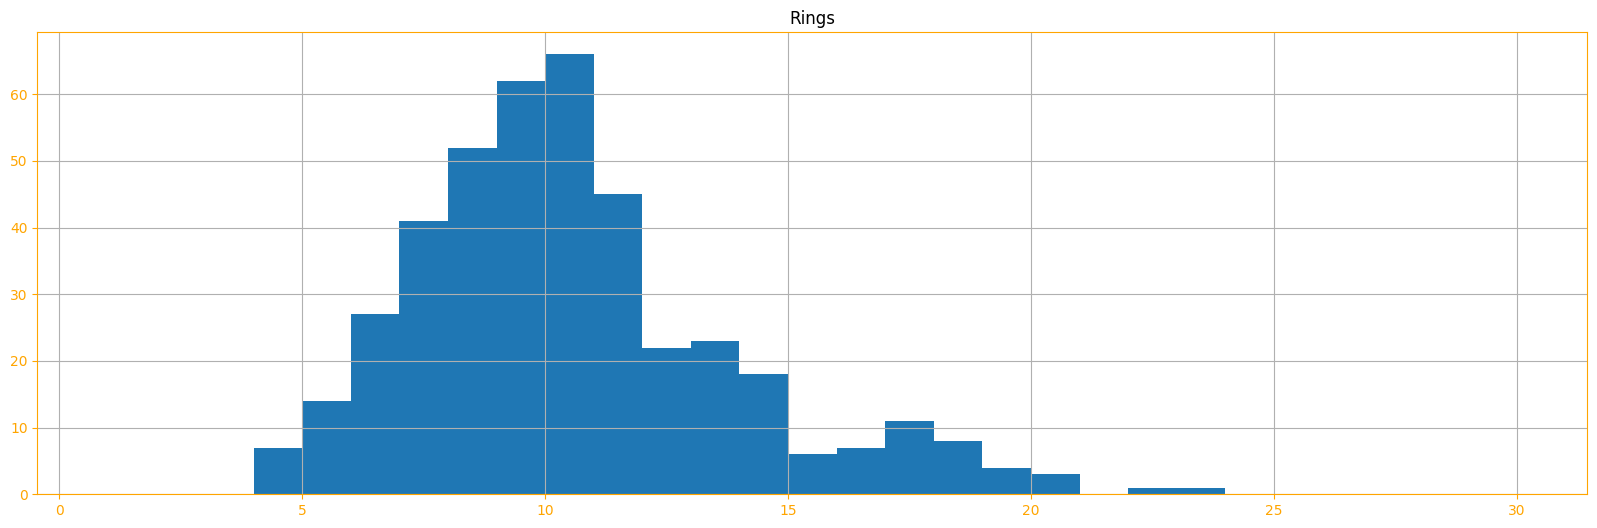

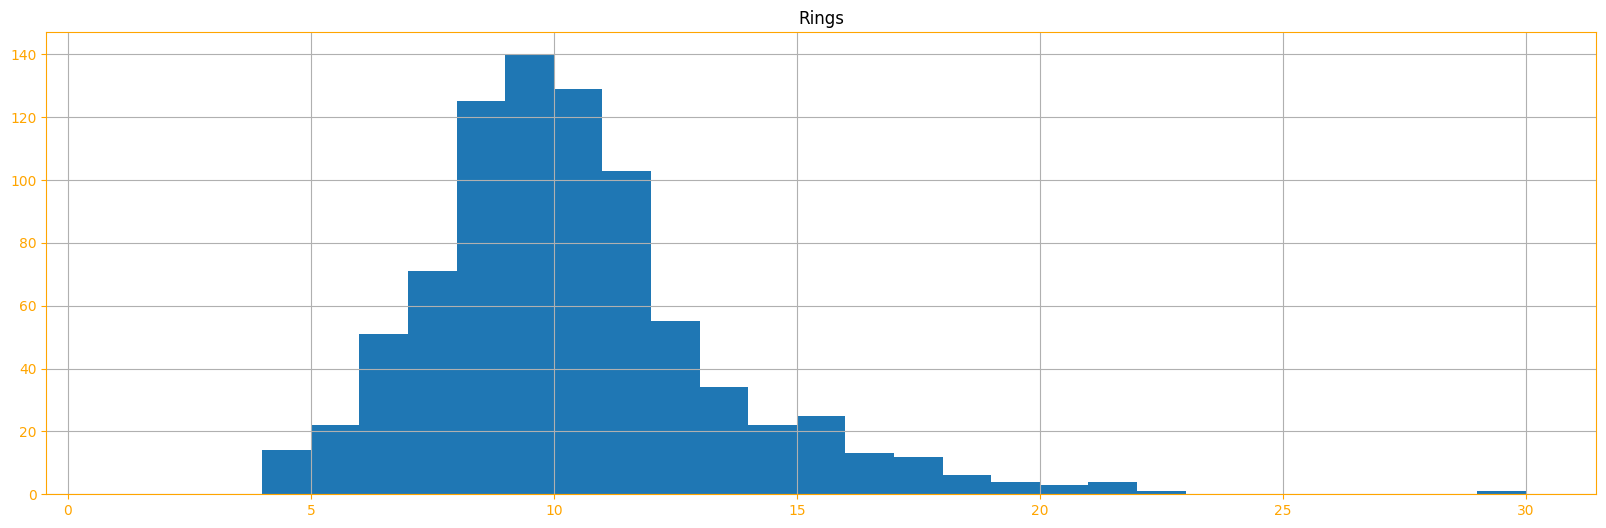

In [10]:
with plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'orange', 'ytick.color':'orange'}):
    df_train.hist(column="Rings", bins=np.arange(df["Rings"].min(), df["Rings"].max()+2), figsize=(20,6))
    df_val.hist(column="Rings", bins=np.arange(df["Rings"].min(), df["Rings"].max()+2), figsize=(20,6))
    df_test.hist(column="Rings", bins=np.arange(df["Rings"].min(), df["Rings"].max()+2), figsize=(20,6))